 run the same problem as simulation 1 with the pyhmc

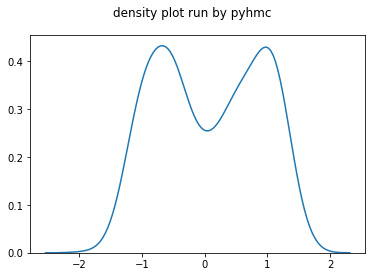

In [11]:
import numpy as np
from pyhmc import hmc
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pystan
from autograd import jacobian
import pystan

def logprob(theta):
    logp = 2 * theta**2 - theta**4
    grad= 4 * theta - 4 * theta**3
    return logp, grad

theta0=np.array([0])

samples=hmc(logprob,x0=theta0,n_samples=1000)

plot1=sns.distplot(samples,kde=True,hist=False)
plt.suptitle("density plot run by pyhmc")
plt.savefig('comp_hmc.png')

 run the same problem as simulation 1 with the pystan

In [9]:
model = '''
    functions {
          real u_lpdf (real theta) {return 2*theta^2 - theta^4;} # self defined function
    }
    data {
    }
    parameters {
        real theta;
    }
    model {
        theta ~ u_lpdf();
    }
    
    '''

# no data needed for this exmaple
data = {}
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=data, iter=2000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a211406f45dd6139212097030b6461f7 NOW.


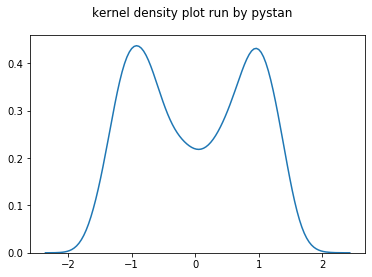

In [12]:
kdeplt1 = sns.kdeplot(fit["theta"])
plt.suptitle("kernel density plot run by pystan")
plt.savefig('comp_stan.png')